# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [2]:
import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

C = [[1,2,3]]

D = [[1],[4],[7]]

def multiply_matrix(A,B):
    A = np.array(A)
    B = np.array(B)
    res = np.zeros((A.shape[0], B.shape[1]))

    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i,j] = sum(A[i,:] * B[:,j])

    return res 

multiply_matrix(C, D)


array([[30.]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [6]:
# 2.1 #got help from Javad
n = 0
number_of_matrix = 3
while n < number_of_matrix:
    matrix = np.random.randint(0,10, size=(5,5))
    if np.linalg.det(matrix) == 0: #get a determinant of zero (which means the matrix will be non-invertible)
        n += 1
        print(matrix)
        print("~~~~~~")

[[5 0 2 4 5]
 [0 8 7 4 8]
 [5 3 7 4 0]
 [1 6 2 6 7]
 [2 7 2 8 1]]
~~~~~~
[[0 0 0 0 0]
 [9 9 5 6 8]
 [1 1 8 9 3]
 [6 9 2 1 0]
 [5 1 9 0 5]]
~~~~~~
[[0 5 4 3 5]
 [0 4 9 3 4]
 [0 2 0 8 9]
 [0 9 8 0 1]
 [0 5 9 8 2]]
~~~~~~


In [ ]:
# 2.2 The identity matrix I is necessarily a square with only 1's on the diagonal because it is necessary that when multiplied (dot product) with another matrix, it does not change the matrix it is dot-producted with. Essentially, the identity matrix plays a similar role in operations with matrices as the number 1 plays in operations with real numbers. The dot product of any square matrix with the identity matrix of appropriate size is always the original matrix, regardless of the order in which the multiplication was performed. In other words, A⋅I = I⋅A = A.

In [ ]:
# Illustrative example:

# [[a, b] dot [[1, 0]
#  [c, d]]     [0, 1]]

# [[(a*1 + b*0), (a*0 + b*1]
#  [(c*1 + d*0), (c*0 + d*1)]]

# gives [[a, b]
#        [c, d]]

In [82]:
# 2.3 with help from Javad
still_looking = True
while still_looking:
    m1 = np.random.randint(0,10, size=(3,3))
    m2 = np.random.randint(0,10, size=(3,3))
    m3 = np.random.randint(0,10, size=(3,3))
    tr1 = np.trace(m1 @ m2 @ m3) # for 3 matrices, has to be cyclic to work: tr(ABC) = tr(CBA) = tr(BAC) != tr(ACB)
    tr2 = np.trace(m1 @ m3 @ m2) 
    if tr1 != tr2: # we want an example where it is false, so we are asking for tr(ABC) != tr(ACB)
        still_looking = False
        print(m1,m2,m3, sep="\n~~~~~\n")
        print(f'\ntr1 = {tr1},\ntr2 = {tr2}')

[[6 0 7]
 [6 7 9]
 [6 8 5]]
~~~~~
[[7 2 8]
 [4 6 7]
 [4 4 6]]
~~~~~
[[5 7 9]
 [5 7 5]
 [7 9 6]]

tr1 = 5961,
tr2 = 5802


In [75]:
# 2.4 finding an indempotent matrix:

still_look = True
while still_look:
    m1 = np.random.randint(0,3, size=(4,4))
    if (m1 @ m1 == m1).all():
        still_look = False
        print(f'm1=\n{m1}\n\n m1 @ m1=\n{m1 @ m1}')
        print(f'\n\nDoes m1 == m1 @ m1? \n{(m1 == m1@m1).all()}')

m1=
[[0 0 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [1 0 1 0]]

 m1 @ m1=
[[0 0 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [1 0 1 0]]


Does m1 == m1 @ m1? 
True


In [ ]:
# OR: 2.4
import numpy as np
def find_idempotent():
    while True:
        mat = np.random.randint(-3,3, size=(4,4))
        mat_sq = np.dot(mat,mat)
        if np.array_equal(mat, mat_sq): 
            return mat
find_idempotent() 

In [104]:
# 2.5
import numpy as np 

a = np.array([[1, 1, 1],
              [0, 2, 5],
              [2, 5, -1]])
b = np.array([6, -4, 27])


x = np.linalg.solve(a, b)
x

print(f"x = {x[0]}, y = {x[1]}, z = {x[2]}")

x = 5.0, y = 3.0, z = -2.0


In [105]:
np.allclose(np.dot(a, x), b)

True

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [2]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = load_boston()['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [155]:
# print(boston_dataset.DESCR)

In [3]:
sns.set()

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']
X = sm.add_constant(X)

est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        14:05:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
print(f"The R-squared is: {est.rsquared:.3f}\n")
print(f"The coefficients for the regression are given by:\n{est.params}")

The R-squared is: 0.741

The coefficients for the regression are given by:
const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64


# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [153]:
# checking squared features:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = load_boston()['target']

sns.set()

#remove features with an insignificant p-value from multilinear regression. 
boston = boston.drop(columns=['INDUS', 'AGE'])

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_sq = X.apply(np.square)
X_sq.columns = X.columns+"_sq"

new_df = pd.concat((X, X_sq), axis=1)
new_df["constant"] = 1

est = sm.OLS(y,new_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     113.1
Date:                Thu, 14 Jan 2021   Prob (F-statistic):          1.68e-171
Time:                        00:05:27   Log-Likelihood:                -1390.8
No. Observations:                 506   AIC:                             2826.
Df Residuals:                     484   BIC:                             2919.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.3781      0.084     -4.501      0.000      -0.543      -0.213
ZN            -0.0548      0.031     -1.768      0.078      -0.116       0.006
CHAS           1.2774      0.353      3.618      0.000       0.584       1.971
NOX          -20.0442     24.024     -0.834      0.404     -67.248      27.159
RM           -18.9023      2.769     -6.826      0.000     -24.343     -13.462
DIS           -2.7605      0.524     -5.272      0.000      -3.789      -1.732
RAD            0.5761      0.208      2.770      0.006       0.168       0.985
TAX           -0.0338      0.012     -2.906      0.004      -0.057      -0.011
PTRATIO       -5.2317      1.655     -3.161      0.002      -8.484      -1.979
B              0.0242      0.011      2.221      0.027       0.003       0.046
LSTAT         -1.3351      0.119    -11.204      0.000      -1.569      -1.101
CRIM_sq        0.0030      0.001      2.789      0.005       0.001       0.005
ZN_sq          0.0007      0.000      2.106      0.036    4.82e-05       0.001
CHAS_sq        1.2774      0.353      3.618      0.000       0.584       1.971
NOX_sq        -2.0339     17.676     -0.115      0.908     -36.764      32.697
RM_sq          1.7218      0.216      7.963      0.000       1.297       2.147
DIS_sq         0.1526      0.043      3.522      0.000       0.067       0.238
RAD_sq        -0.0100      0.008     -1.208      0.228      -0.026       0.006
TAX_sq      2.753e-05   1.46e-05      1.890      0.059   -1.09e-06    5.61e-05
PTRATIO_sq     0.1252      0.047      2.676      0.008       0.033       0.217
B_sq       -4.083e-05    2.4e-05     -1.704      0.089   -8.79e-05    6.24e-06
LSTAT_sq       0.0232      0.003      7.028      0.000       0.017       0.030
constant     159.6947     20.937      7.627      0.000     118.555     200.834
==============================================================================
Omnibus:                      153.702   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2589.512
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                      13.953   Cond. No.                     1.43e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
# checking cubed (x**3) features (best model):
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = load_boston()['target']

sns.set()

#remove features with an insignificant p-value from multilinear regression.
boston = boston.drop(columns=['INDUS', 'AGE'])

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_sq = X.apply(np.square)
X_sq.columns = X.columns+"_sq"
new_df = pd.concat((X, X_sq), axis=1)

X_cb = X.pow(3)
X_cb.columns = X.columns+"_cb"

new_df_2 = pd.concat((new_df, X_cb), axis=1)
new_df_2["constant"] = 1

est = sm.OLS(y,new_df_2).fit()
est.summary()

# MODELS VERIFIED:
# With multiple linear regression and constant:
# AIC: 3025, BIC: 3085, log-likelihood: -1498.8

# With multiple linear regression, and NO constant:
# AIC: 3074, BIC: 3128, log-likelihood: -1523.8


# With squared values and a constant:
# AIC: 2826, BIC: 2919, log-likelihood: -1390.8

# With squared values and NO constant:
# AIC: 2881, BIC: 2970, log-likelihood: -1419.5


# With cubed values and NO constant: 
# AIC: 2805, BIC: 2936, log-likelihood: -1371.6, R2 = 0.978

# With cubed values and a constant (see below):
# AIC: 2804, BIC: 2939, log-likelihood: -1370.0, R2 = 0.844

# Best models are cubed. Possibly better model without intercept. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     82.78
Date:                Thu, 14 Jan 2021   Prob (F-statistic):          5.73e-170
Time:                        00:05:39   Log-Likelihood:                -1370.0
No. Observations:                 506   AIC:                             2804.
Df Residuals:                     474   BIC:                             2939.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.6503      0.165     -3.944      0.000      -0.974      -0.326
ZN             0.0386      0.062      0.624      0.533      -0.083       0.160
CHAS           0.8545      0.230      3.708      0.000       0.402       1.307
NOX          379.3342    144.938      2.617      0.009      94.535     664.134
RM           -25.9062     15.864     -1.633      0.103     -57.079       5.266
DIS           -5.8808      1.337     -4.400      0.000      -8.507      -3.254
RAD            1.5948      0.662      2.409      0.016       0.294       2.896
TAX           -0.2052      0.064     -3.230      0.001      -0.330      -0.080
PTRATIO      -11.6968     14.822     -0.789      0.430     -40.822      17.429
B             -0.0032      0.028     -0.115      0.909      -0.057       0.051
LSTAT         -1.8787      0.285     -6.587      0.000      -2.439      -1.318
CRIM_sq        0.0125      0.005      2.367      0.018       0.002       0.023
ZN_sq         -0.0024      0.002     -1.200      0.231      -0.006       0.002
CHAS_sq        0.8546      0.230      3.708      0.000       0.402       1.307
NOX_sq      -654.4390    236.214     -2.771      0.006   -1118.594    -190.283
RM_sq          2.8412      2.529      1.123      0.262      -2.129       7.811
DIS_sq         0.8002      0.240      3.331      0.001       0.328       1.272
RAD_sq        -0.1721      0.095     -1.806      0.072      -0.359       0.015
TAX_sq         0.0005      0.000      2.975      0.003       0.000       0.001
PTRATIO_sq     0.5154      0.864      0.597      0.551      -1.182       2.213
B_sq           0.0001      0.000      0.793      0.428      -0.000       0.000
LSTAT_sq       0.0604      0.017      3.492      0.001       0.026       0.094
CRIM_cb    -7.937e-05    4.4e-05     -1.806      0.072      -0.000       7e-06
ZN_cb       2.432e-05   1.57e-05      1.552      0.121   -6.48e-06    5.51e-05
CHAS_cb        0.8546      0.230      3.708      0.000       0.402       1.307
NOX_cb       342.3962    125.060      2.738      0.006      96.655     588.137
RM_cb         -0.0581      0.132     -0.440      0.660      -0.318       0.202
DIS_cb        -0.0372      0.013     -2.820      0.005      -0.063      -0.011
RAD_cb         0.0052      0.003      1.759      0.079      -0.001       0.011
TAX_cb     -3.527e-07   1.22e-07     -2.896      0.004   -5.92e-07   -1.13e-07
PTRATIO_cb    -0.0077      0.017     -0.462      0.644      -0.040       0.025
B_cb       -2.345e-07   2.15e-07     -1.091      0.276   -6.57e-07    1.88e-07
LSTAT_cb      -0.0007      0.000     -2.232      0.026      -0.001   -8.43e-05
constant     155.1562     91.565      1.694      0.091     -24.768     335.080
==============================================================================
Omnibus:                      131.765   Durbin-Watson:                   1.269
Pr

In [83]:
# from sklearn.preprocessing import PolynomialFeatures
# polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
# x = polynomial_converter.fit_transform(X)

# est = sm.OLS(y, x).fit()
# est.summary()

# Using it this way means we don't know which features go with which coefficients. 

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

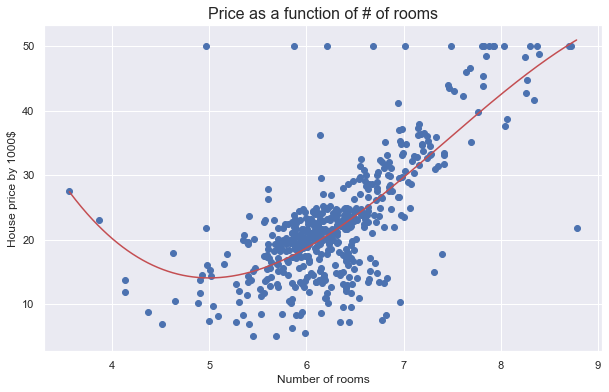

In [105]:
boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target # target is PRICE

boston_2 = new_df_3.copy()
boston_2['PRICE'] = load_boston().target

X_room = boston_2['RM'] #New df with only RM, ignores other features

y_price = boston_2.PRICE # y is the price
y_price = np.array(y_price)

X_room = sm.add_constant(X_room) # add constant
X_room1 = np.array(X_room) #deg 1
X_room2 = np.concatenate([X_room1, np.square(X_room1[:,1])[:, np.newaxis]],axis=1) # deg 2 
# for future reference, can also import things into a dataframe and then add columns instead of using newaxis
X_room3 = np.concatenate([X_room2, (X_room1[:,1]**3)[:, np.newaxis]], axis=1) # deg 3

# Model where price (dependent) and number of rooms and occurence is X
results1 = sm.OLS(y_price, X_room).fit() # deg 1
results2 = sm.OLS(y_price, X_room2).fit() # deg 2
results3 = sm.OLS(y_price, X_room3).fit() # deg 3

bmin, bmax = boston_2.RM.min(), boston_2.RM.max() # min and max observed

# Max and min of observed values
x_hat1 = sm.add_constant(np.linspace(bmin, bmax, len(boston_2)))
x_hat2 = np.concatenate([x_hat1, np.square(x_hat1[:,1])[:, np.newaxis]], axis=1) # square term here 
x_hat3 = np.concatenate([x_hat2, (x_hat1[:,1]**3)[:, np.newaxis]], axis=1) # third degree

y_hat1 = results1.predict(x_hat1[:, np.newaxis]) #degree 1 predictions
y_hat2 = results2.predict(x_hat2[: np.newaxis]) # degree 2 predictions
y_hat3 = results3.predict(x_hat3[:, np.newaxis]) # degree 3 predictions

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x_hat1[:, 1], y_hat3, 'r') # num of rooms and pred of price
plt.scatter(boston_2['RM'], y_price) #num of rooms and actual price
plt.title('Price as a function of # of rooms', size= 16)
plt.xlabel('Number of rooms')
plt.ylabel('House price by 1000$')
plt.show()


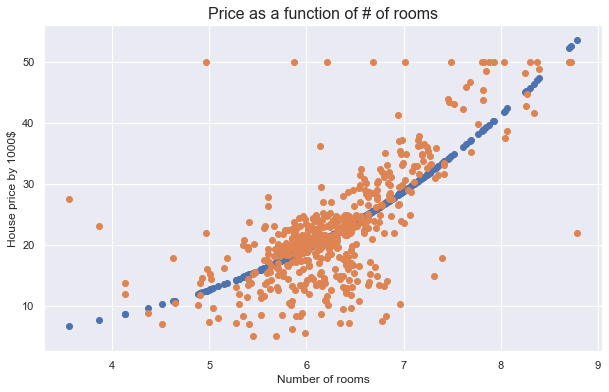

In [121]:
# for degree 2, and using plt.scatter instead of plt.plot for regression line. 

import matplotlib.pyplot as plt 
new_df_2['PRICE'] = y 

small_df3 = new_df_2['RM_cb'] # New df with only RM_cb

small_df3 = sm.add_constant(small_df3) #add constant

small_est = sm.OLS(y, small_df3).fit() # Model

small_est.summary()

y_hat = small_est.predict(small_df3) # Predictions

# sns.set_theme(style="darkgrid",palette='Set2', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(new_df_3['RM'], y_hat) #Num of rooms and prediction of price
plt.scatter(new_df_3['RM'], y) # Num of rooms and actual price
plt.title('Price as a function of # of rooms', size= 16)
plt.xlabel('Number of rooms')
plt.ylabel('House price by 1000$')
plt.show()


# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [152]:
# 4 most important features: LSTAT, RM_cb, PTRATIO_cb, TAX
print(new_df_2.corrwith(y)
              .abs()
              .sort_values(ascending=False))

PRICE         1.000000
LSTAT         0.737663
RM_cb         0.730250
RM_sq         0.718169
RM            0.695360
LSTAT_sq      0.622179
LSTAT_cb      0.512916
PTRATIO_cb    0.511891
PTRATIO_sq    0.510658
PTRATIO       0.507787
TAX           0.468536
TAX_sq        0.457047
TAX_cb        0.445645
NOX           0.427321
NOX_sq        0.416889
NOX_cb        0.399665
RAD_cb        0.394169
RAD_sq        0.390758
CRIM          0.388305
RAD           0.381626
ZN            0.360445
B_sq          0.335940
B             0.333461
B_cb          0.330596
ZN_sq         0.314601
ZN_cb         0.294616
DIS           0.249929
CRIM_sq       0.218837
DIS_sq        0.195869
CHAS_sq       0.175260
CHAS_cb       0.175260
CHAS          0.175260
CRIM_cb       0.149662
DIS_cb        0.146957
constant           NaN
dtype: float64


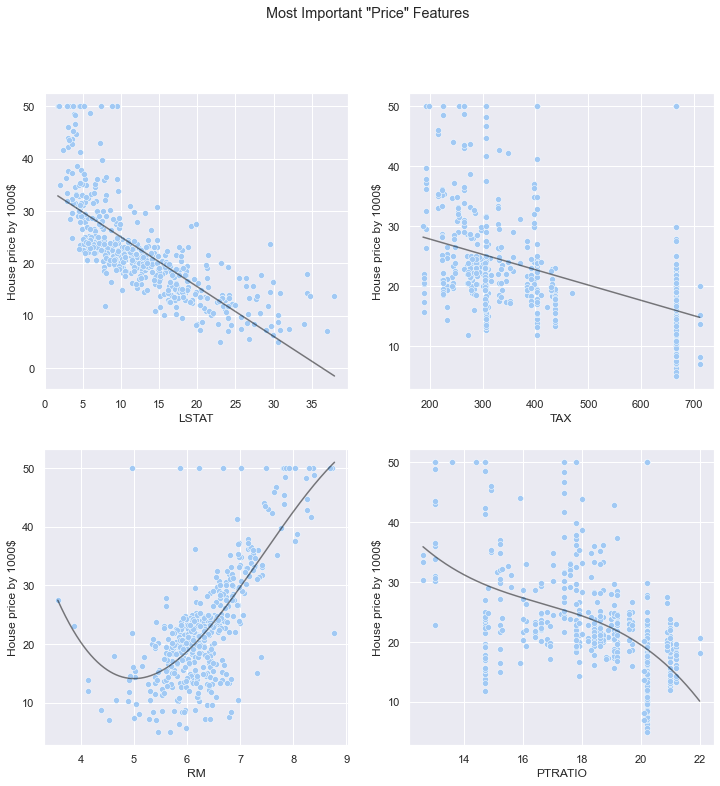

In [148]:
boston = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
boston['PRICE'] = load_boston().target # target is PRICE
y = boston['PRICE']

def reg_plot_on_ax(myfeature, myaxes, degree=1):
    """
    Takes a feature and an axis and
    returns a plot for the four chosen
    features and axes.
    """
    X = boston[myfeature]
    fmin, fmax = boston[myfeature].min(), boston[myfeature].max()
    coefs = np.polyfit(X, y, degree)
    sns.set_palette("pastel")  
    sns.scatterplot(X, y, ax=myaxes)
    myaxes.set(xlabel=myfeature, ylabel='House price by 1000$')

    xfit = np.linspace(fmin, fmax, 1000)
    yfit = np.polyval(coefs, xfit)
    sns.lineplot(xfit, yfit, color="black", ax=myaxes, alpha=0.5)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Most Important "Price" Features')
reg_plot_on_ax('LSTAT', ax1)
reg_plot_on_ax('TAX', ax2)
reg_plot_on_ax('RM', ax3, 3)
reg_plot_on_ax('PTRATIO', ax4, 3)